In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [102]:
df = pd.read_excel('4.xlsx')

In [103]:
df.head(32)

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan
0,2022-06-17,20444.6,20391.3,21315.4,20244.1,136.27,Naik
1,2022-06-18,18986.5,20446.4,20744.7,17630.5,267.25,Turun
2,2022-06-19,20577.2,18983.4,20763.5,17983.7,169.39,Naik
3,2022-06-20,20572.3,20576.9,20996.8,19658.8,140.60,Turun
4,2022-06-21,20720.4,20571.6,21689.3,30371.7,136.32,Naik
5,2022-06-22,19965.8,20720.2,20864.3,19780.2,125.94,Turun
6,2022-06-23,21100.7,19967.3,21189.8,19907.5,110.70,Naik
7,2022-06-24,21226.9,21100.9,21488.7,20743.9,104.56,Naik
8,2022-06-25,212489.9,21226.9,21553.4,20917.5,66.63,Naik
9,2022-06-26,21043.5,21489.9,21837.4,20989.7,67.21,Turun


In [104]:
print(df[df['Perubahan'] == 'Naik'].count())

Tanggal      17
Terakhir     17
Pembukaan    17
Tertinggi    17
Terendah     17
Vol          17
Perubahan    17
dtype: int64


In [105]:
print(df[df['Perubahan'] == 'Turun'].count())

Tanggal      22
Terakhir     22
Pembukaan    22
Tertinggi    22
Terendah     22
Vol          22
Perubahan    22
dtype: int64


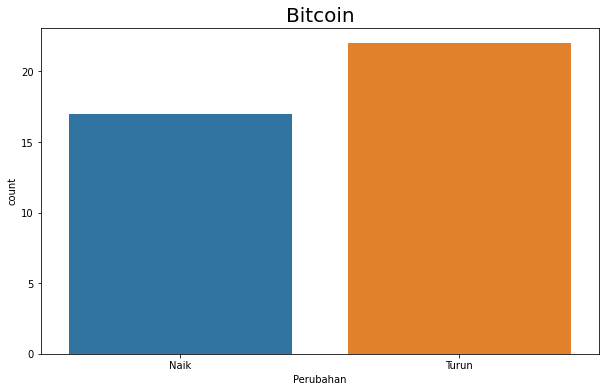

In [106]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Perubahan")
plt.title("Bitcoin", fontsize=20)
plt.show()

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Tanggal    39 non-null     datetime64[ns]
 1   Terakhir   39 non-null     float64       
 2   Pembukaan  39 non-null     float64       
 3   Tertinggi  39 non-null     float64       
 4   Terendah   39 non-null     float64       
 5   Vol        39 non-null     float64       
 6   Perubahan  39 non-null     object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 2.3+ KB


In [108]:
df_features = df.drop(['Tanggal', 'Perubahan'], axis=1)
df_target = df['Perubahan']

In [109]:
cols = ['Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah', 'Vol']
df_features[cols] = df_features[cols].astype('category')

df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Terakhir   39 non-null     category
 1   Pembukaan  39 non-null     category
 2   Tertinggi  39 non-null     category
 3   Terendah   39 non-null     category
 4   Vol        39 non-null     category
dtypes: category(5)
memory usage: 7.1 KB


In [110]:
for col in cols:
    df_features[col] = df_features[col].cat.codes
df_features.head(32)

,Terakhir,Pembukaan,Tertinggi,Terendah,Vol
0,13,13,19,18,16
1,0,14,9,0,34
2,16,0,10,1,26
3,15,17,15,10,20
4,18,16,26,38,17
5,7,19,13,12,13
6,24,7,17,16,10
7,27,25,20,24,8
8,38,27,22,26,2
9,23,28,28,27,3


In [111]:
scale = StandardScaler().fit(df_features).transform(df_features.astype(float))
# scale = StandardScaler().fit_transform(df_features)
cols = list(df_features.columns)

df_features_scale = pd.DataFrame(scale, columns=cols)
df_features_scale.head()

,Terakhir,Pembukaan,Tertinggi,Terendah,Vol
0,-0.533114,-0.533114,0.000000,-0.088852,-0.266557
1,-1.688194,-0.444262,-0.888523,-1.688194,1.332785
2,-0.266557,-1.688194,-0.799671,-1.599342,0.621966
3,-0.355409,-0.177705,-0.355409,-0.799671,0.088852
4,-0.088852,-0.266557,0.621966,1.688194,-0.177705


In [112]:
X_train, X_test, y_train, y_test = train_test_split(df_features_scale, df_target, test_size=0.35, random_state=10)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (25, 5) (25,)
Test set: (14, 5) (14,)


In [113]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
print("Before undersampling: ", Counter(y_train))
undersample = RandomUnderSampler(sampling_strategy='majority')
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)
print("After undersampling: ", Counter(y_train_under))

Before undersampling:  Counter({'Naik': 14, 'Turun': 11})
After undersampling:  Counter({'Naik': 11, 'Turun': 11})


In [114]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0,1))
X_scaled = sc.fit_transform(df_features)

In [115]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [116]:
y_pred = dt.predict(X_test) 
y_pred[0:5]

array(['Turun', 'Turun', 'Naik', 'Turun', 'Turun'], dtype=object)

In [117]:
y_test[0:5]

33    Turun
34    Turun
2      Naik
12    Turun
7      Naik
Name: Perubahan, dtype: object

In [118]:
print('Akurasi Train set: ', accuracy_score(y_train, dt.predict(X_train)))
print('Akurasi Test set: ', accuracy_score(y_test, y_pred))

Akurasi Train set:  0.96
Akurasi Test set:  0.7142857142857143


In [119]:
dt.score(X_test, y_test)

0.7142857142857143

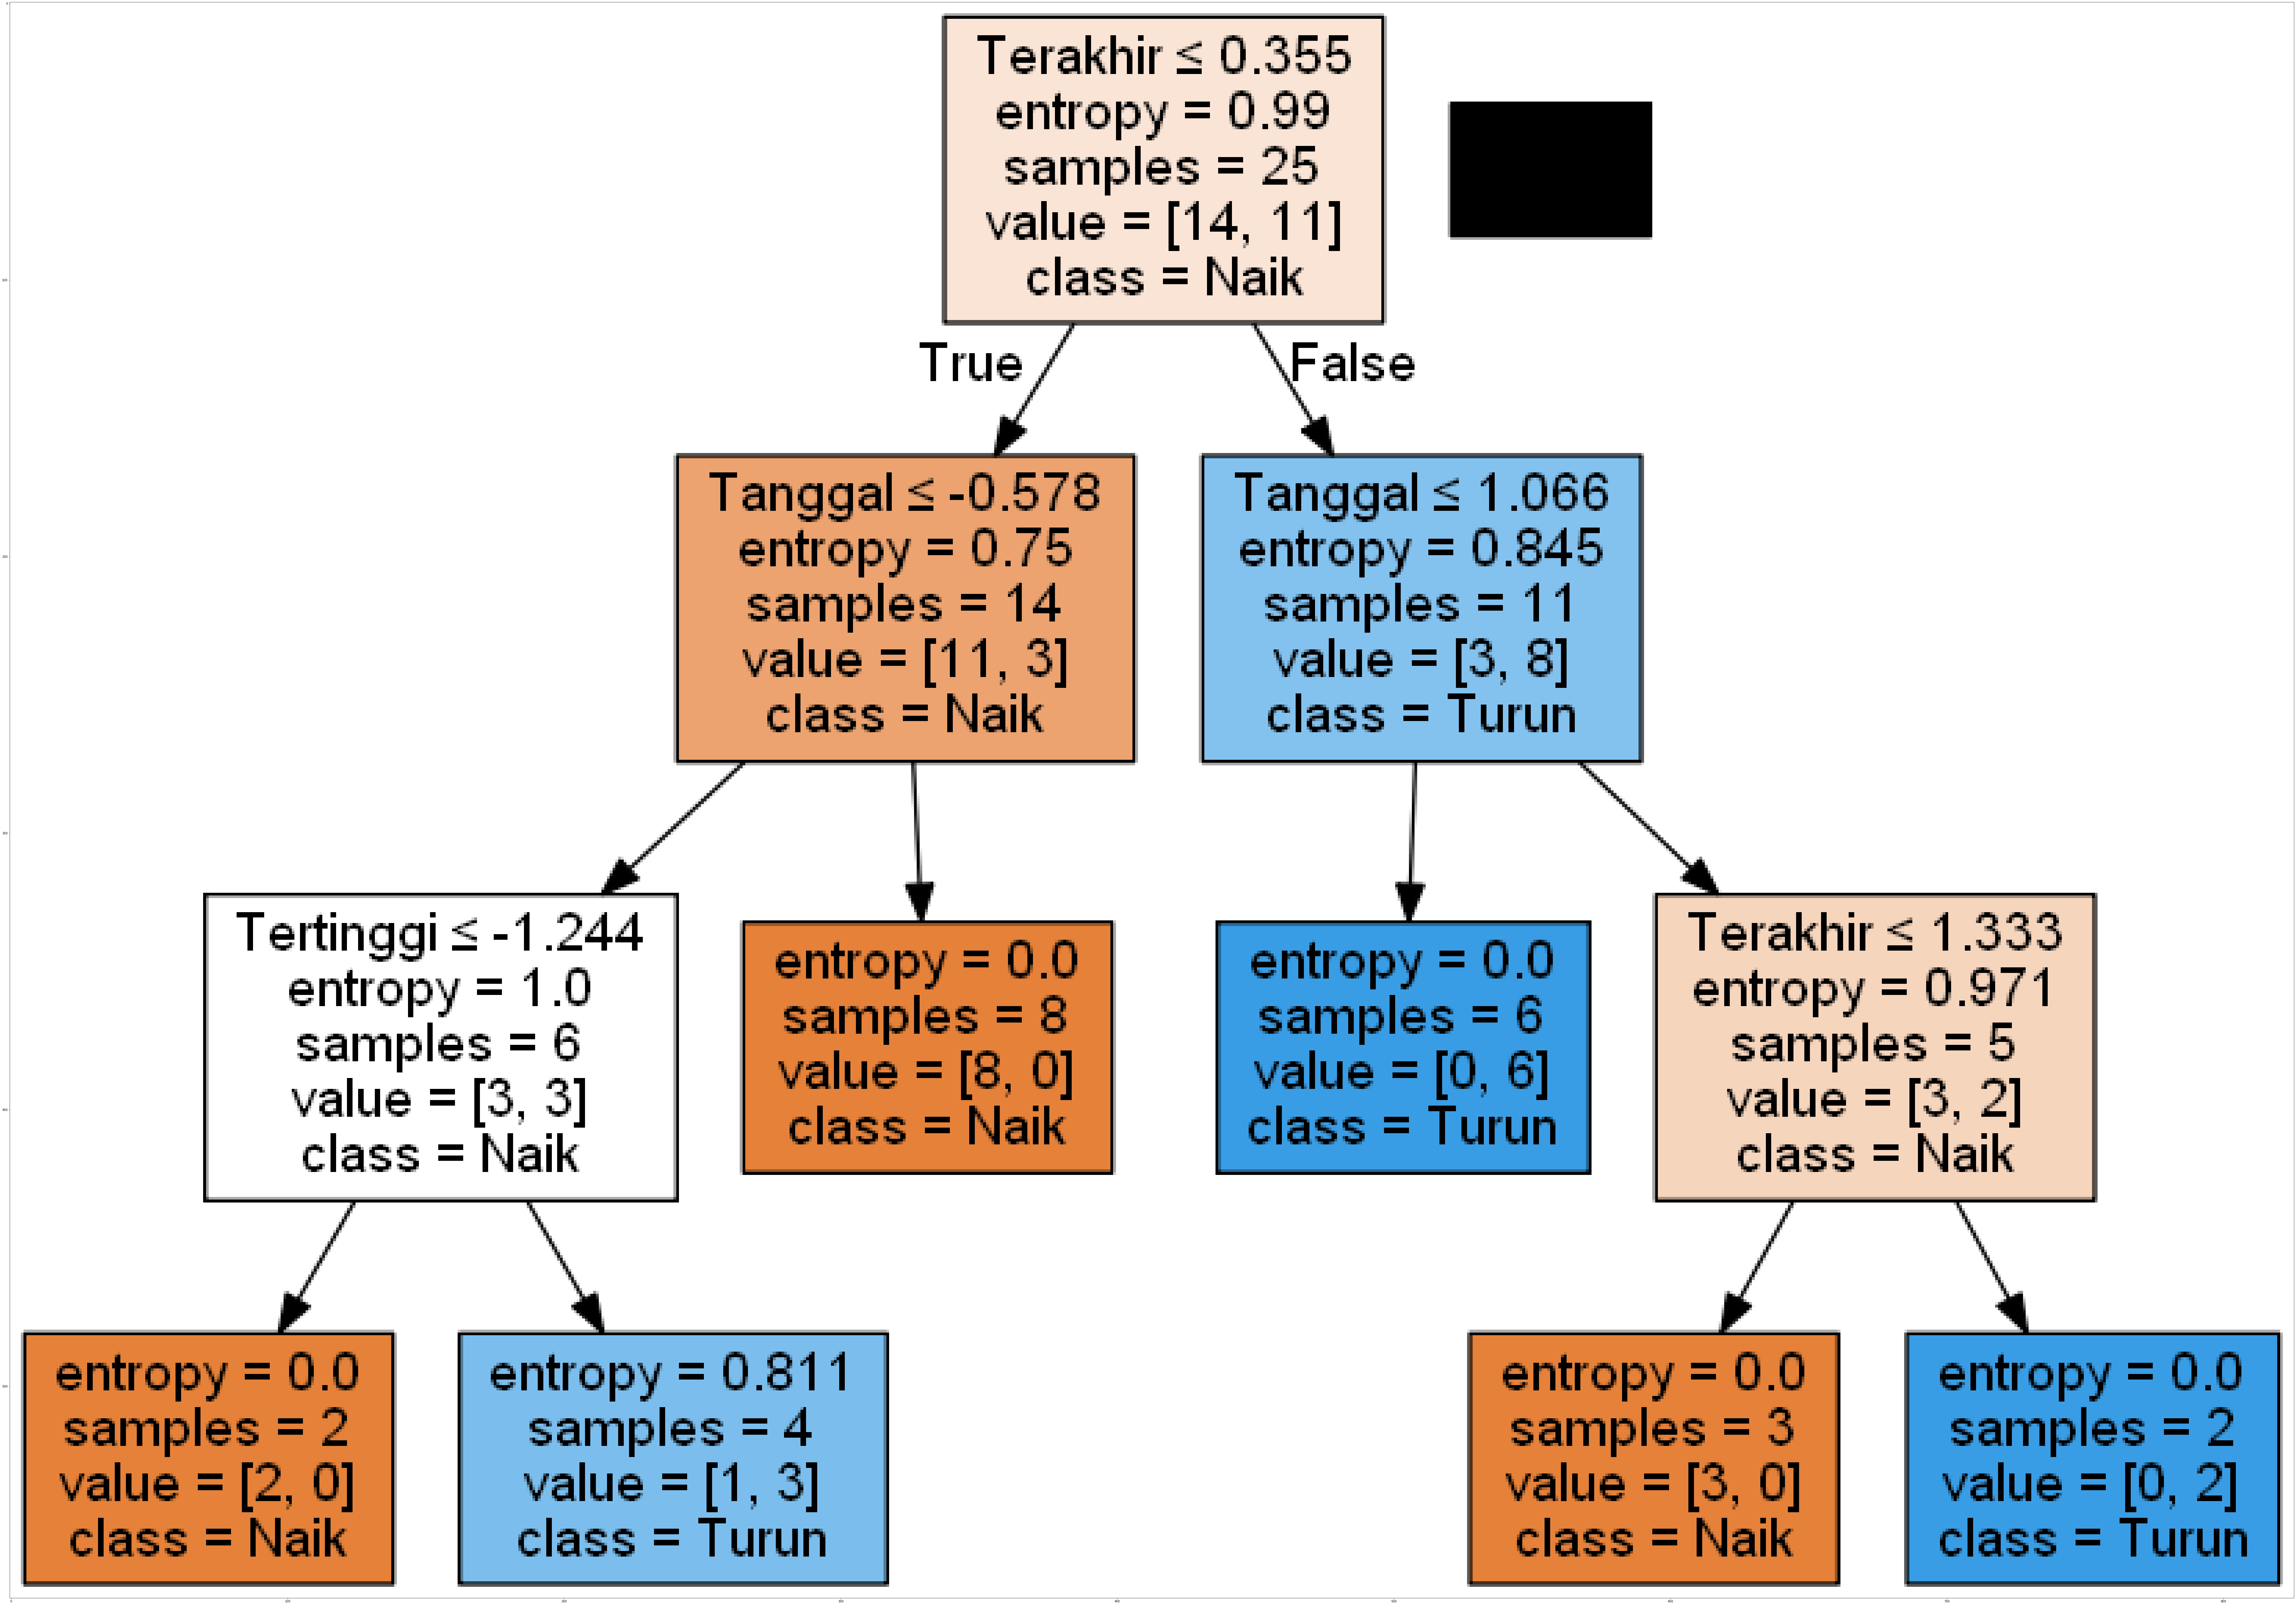

In [120]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree\

import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"


%matplotlib inline

dot_data = StringIO()
filename = 'teuing_tree.png'
featuresNames = df.columns[0:5]
targetNames = df['Perubahan'].unique().tolist()

out = tree.export_graphviz(dt, feature_names=featuresNames, out_file=dot_data, class_names=np.unique(y_train), 
                           filled=True, special_characters=True, rotate=False)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)

img = mpimg.imread(filename)
plt.figure(figsize=(200, 100))
plt.imshow(img, interpolation='nearest')